#### Используется датасет Electronic_sales_Sep2023-Sep2024.csv

### Задание 1
На основании датасета для каждого покупателя получите:
 - предпочитаемый метод оплаты; 
 - общие траты;
 - количество денег, потраченных на дополнительные услуги и аксессуары.

Примечание: для расчёта предпочитаемого метода оплаты я брал самый частоиспользуемый метод.

In [67]:
import pandas as pd

data = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv') # импо

# data.info()

# data.groupby(['Customer ID'])[['Total Price']].sum()
# data.groupby(['Customer ID'])[['Add-on Total']].sum()
# data.groupby(['Customer ID'])[['Payment Method']].agg(lambda x: x.value_counts().idxmax())

summary = ( 
    data.groupby('Customer ID').agg({ # группируется информация по Customer ID
        'Payment Method': lambda x: x.value_counts().idxmax(),  # lambda-функция для поиска самого частого значения
        'Total Price': 'sum', 
        'Add-on Total': 'sum',
    })
)

print(summary)

            Payment Method  Total Price  Add-on Total
Customer ID                                          
1000           Credit Card      6279.42         66.30
1002           Credit Card      5020.60         60.16
1003                  Cash        41.50         35.56
1004           Credit Card        83.00         65.78
1005                Paypal     11779.11         75.33
...                    ...          ...           ...
19994        Bank Transfer      5504.87         93.17
19995          Credit Card      5394.56          0.00
19996               PayPal     27296.78        432.12
19997        Bank Transfer      2528.26        101.34
19998        Bank Transfer       674.32          0.00

[12136 rows x 3 columns]


### Задание 2
1. На основании датасета получите доход:
 - по каждому методу доставки, 
 - по каждому типу продукта, 
 - по дополнительным услугам за каждый месяц,
 - по дополнительным услугам за каждый квартал.

2. Отобразите полученные данные на графике.

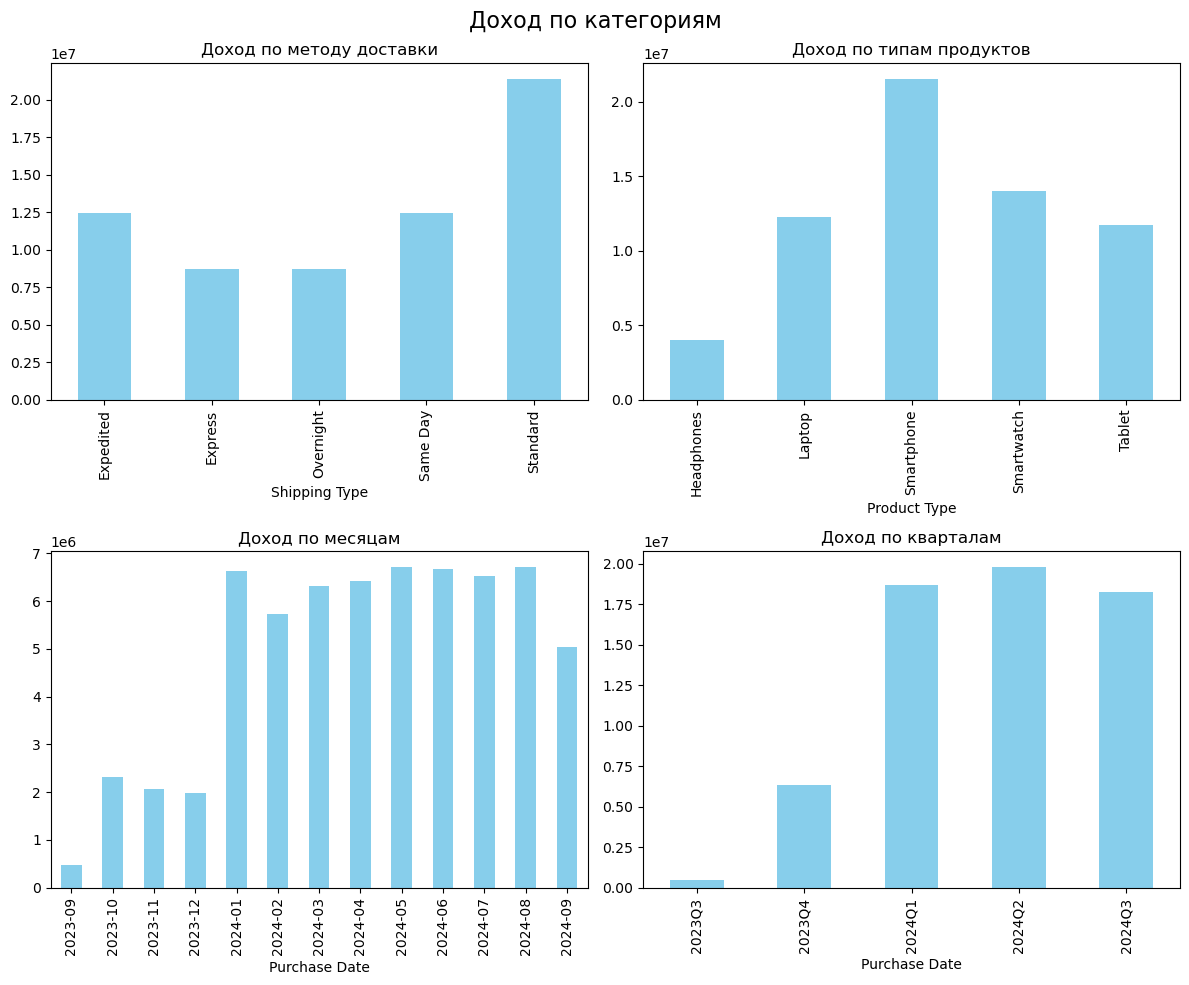

In [66]:
import matplotlib.pyplot as plt # библиотека для графиков

data['Purchase Date'] = pd.to_datetime(data['Purchase Date']) # перевод столбца с датой в формат datetime

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) # создаётся "поле" для графиков. 4 графика, по 2 на строку
fig.suptitle("Доход по категориям", fontsize=16)

delivery = data.groupby('Shipping Type')['Total Price'].sum()
delivery.plot(kind = 'bar', ax = axes[0, 0], color = 'skyblue', title = 'Доход по методу доставки')

product = data.groupby('Product Type')['Total Price'].sum()
product.plot(kind = 'bar', ax = axes[0, 1], color = 'skyblue', title = 'Доход по типам продуктов')

month = data.groupby(data['Purchase Date'].dt.to_period('M'))['Total Price'].sum() # формат даты соответствует datetime
month.plot(kind = 'bar', ax = axes[1, 0], color = 'skyblue', title = 'Доход по месяцам')

quartal = data.groupby(data['Purchase Date'].dt.to_period('Q'))['Total Price'].sum()
quartal.plot(kind = 'bar', ax = axes[1, 1], color = 'skyblue', title = 'Доход по кварталам')

plt.tight_layout() # для аккуратного отображения. Без этой функции графики "наезжают" друг на друга
plt.show()